# Bronze Layer: Data Quality Analysis

This notebook demonstrates the Bronze layer of the Medallion architecture:  
**Raw CSV → Clean Parquet**

## Objectives
1. Load raw Singapore jobs data (1M+ rows)
2. Remove synthetic test rows
3. Drop row-wide nulls
4. Remove useless columns
5. Type casting and validation

In [1]:
# Setup
import sys
import os

# Add project root to Python path (notebooks run from notebooks/ subdirectory)
sys.path.insert(0, os.path.abspath('..'))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from src.etl.sg_jobs_etl import SGJobsETL

# Configure plotting
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Instantiate ETL
etl = SGJobsETL()

## 1. Execute Bronze Pipeline

In [2]:
# Run Bronze layer transformation
bronze_df = etl.run_bronze()

print(f"\nBronze layer shape: {bronze_df.shape}")
print(f"Columns: {len(bronze_df.columns)}")


BRONZE LAYER: Raw Data Cleaning
[Bronze] Loading raw CSV...
[Bronze]   Loaded 1,048,585 rows × 22 columns
[Bronze]   File size: 272.7 MB
[Bronze] Filtering synthetic rows...
[Bronze]   Found 10 RANDOM_JOB_ rows
[Bronze]   Max salary in filtered rows: $23,712,119/month
[Bronze]   Rows with salary >$100k: 10
[Bronze]   Removed 10 synthetic rows
[Bronze] Removing row-wide null entries...
[Bronze]   Removed 3,988 null rows
[Bronze] Dropping useless columns...
[Bronze]   Dropped 3 columns: occupationId, status_id, salary_type
[Bronze] Casting data types...
[Bronze]   Parsed 3 date columns
[Bronze] Saving Bronze parquet...
[Bronze]   Saved to: /Users/overlord/Desktop/DSAI/Module 1/assignment/sg_job_analytics/data/bronze/sg_jobs_bronze.parquet
[Bronze]   File size: 49.1 MB

✅ Bronze layer complete: 1,044,587 rows


Bronze layer shape: (1044587, 19)
Columns: 19


## 2. Data Quality Overview

In [3]:
# Column data types
print("Data Types:")
print(bronze_df.dtypes.value_counts())

print("\nColumn List:")
for i, col in enumerate(bronze_df.columns, 1):
    print(f"{i:2d}. {col} ({bronze_df[col].dtype})")

Data Types:
object            7
Int64             5
datetime64[ns]    3
float64           3
bool              1
Name: count, dtype: int64

Column List:
 1. categories (object)
 2. employmentTypes (object)
 3. metadata_expiryDate (datetime64[ns])
 4. metadata_isPostedOnBehalf (bool)
 5. metadata_jobPostId (object)
 6. metadata_newPostingDate (datetime64[ns])
 7. metadata_originalPostingDate (datetime64[ns])
 8. metadata_repostCount (Int64)
 9. metadata_totalNumberJobApplication (Int64)
10. metadata_totalNumberOfView (Int64)
11. minimumYearsExperience (Int64)
12. numberOfVacancies (Int64)
13. positionLevels (object)
14. postedCompany_name (object)
15. salary_maximum (float64)
16. salary_minimum (float64)
17. status_jobStatus (object)
18. title (object)
19. average_salary (float64)


In [4]:
# Missing data summary
missing_summary = pd.DataFrame({
    'Missing Count': bronze_df.isnull().sum(),
    'Missing %': (bronze_df.isnull().sum() / len(bronze_df) * 100).round(2)
}).sort_values('Missing Count', ascending=False)

print("Missing Data Summary:")
print(missing_summary[missing_summary['Missing Count'] > 0])

Missing Data Summary:
Empty DataFrame
Columns: [Missing Count, Missing %]
Index: []


## 3. Visual Data Quality Assessment

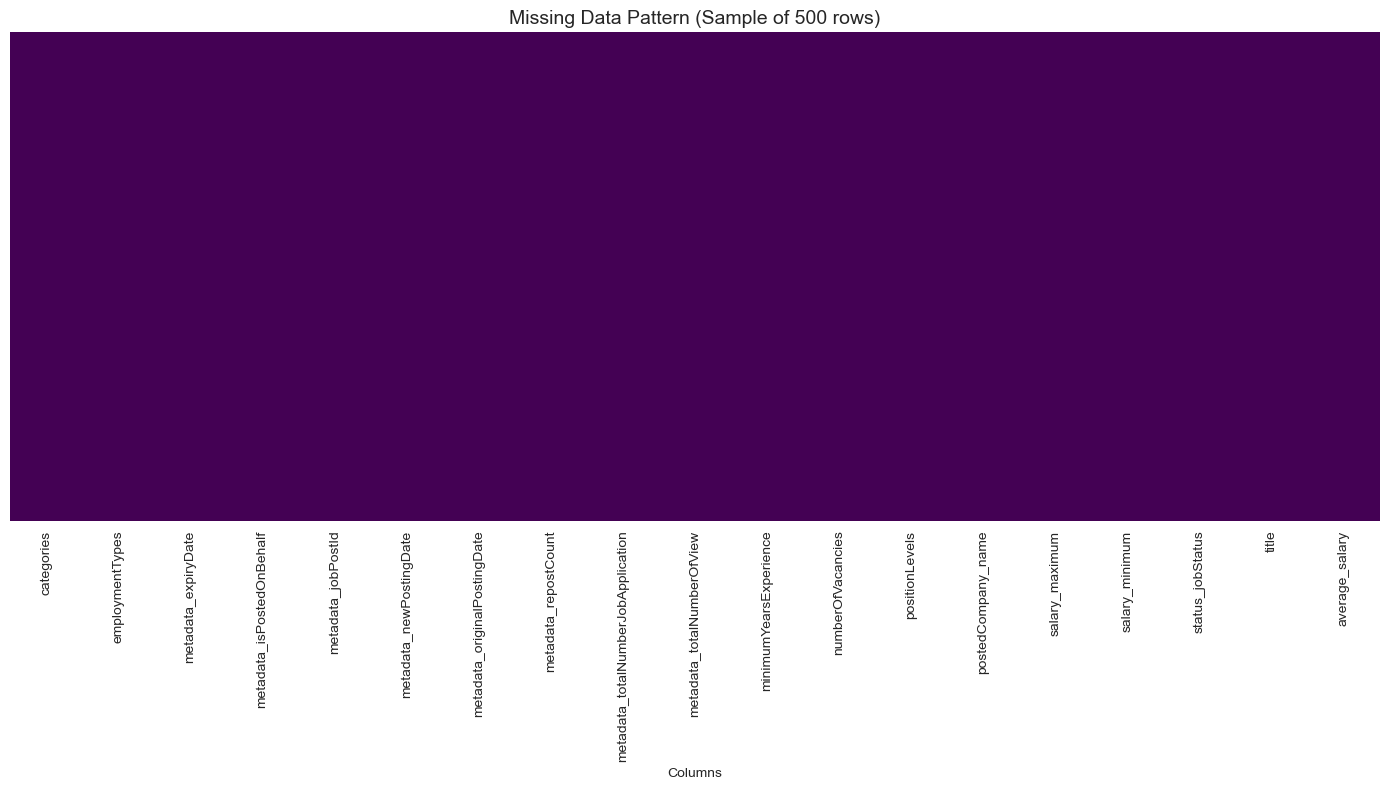

In [5]:
# Missing data heatmap (sample 500 rows for visibility)
sample_df = bronze_df.sample(min(500, len(bronze_df)), random_state=42)

plt.figure(figsize=(14, 8))
sns.heatmap(sample_df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Data Pattern (Sample of 500 rows)', fontsize=14)
plt.xlabel('Columns')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

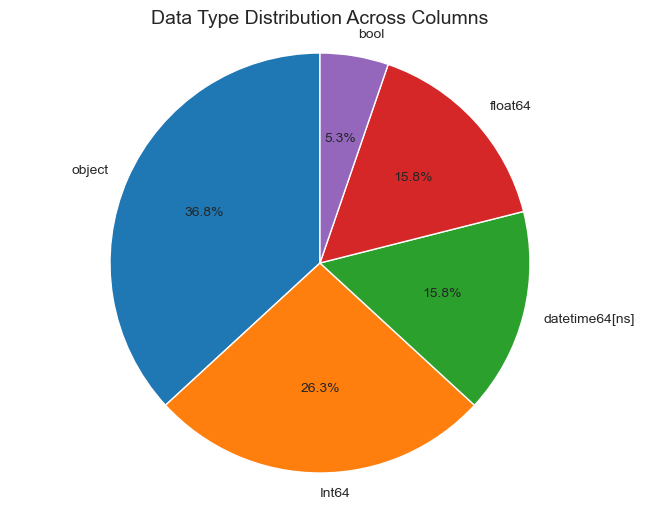

In [6]:
# Data type distribution
dtype_counts = bronze_df.dtypes.value_counts()

plt.figure(figsize=(8, 6))
plt.pie(dtype_counts.values, labels=dtype_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Data Type Distribution Across Columns', fontsize=14)
plt.axis('equal')
plt.show()

## 4. Key Statistics

In [7]:
# Numeric columns summary
print("Numeric Columns Statistics:")
bronze_df.describe()

Numeric Columns Statistics:


,metadata_expiryDate,metadata_newPostingDate,metadata_originalPostingDate,metadata_repostCount,metadata_totalNumberJobApplication,metadata_totalNumberOfView,minimumYearsExperience,numberOfVacancies,salary_maximum,salary_minimum,average_salary
count,1044587,1044587,1044587,1044587.0,1044587.0,1044587.0,1044587.0,1044587.0,1.044587e+06,1.044587e+06,1.044587e+06
mean,2023-11-29 13:26:39.490324992,2023-11-03 21:37:52.132813568,2023-11-01 04:03:32.583920384,0.054927,2.138301,26.820611,2.789757,2.684998,5.630829e+03,3.828188e+03,4.729509e+03
min,2023-04-04 00:00:00,2023-03-28 00:00:00,2022-10-03 00:00:00,0.0,0.0,0.0,0.0,1.0,1.000000e+00,1.000000e+00,1.000000e+00
25%,2023-08-18 00:00:00,2023-07-24 00:00:00,2023-07-21 00:00:00,0.0,0.0,1.0,1.0,1.0,3.300000e+03,2.500000e+03,2.900000e+03
50%,2023-11-24 00:00:00,2023-10-30 00:00:00,2023-10-30 00:00:00,0.0,0.0,4.0,2.0,1.0,4.500000e+03,3.000000e+03,3.800000e+03
75%,2024-03-16 00:00:00,2024-02-20 00:00:00,2024-02-20 00:00:00,0.0,1.0,17.0,4.0,2.0,6.500000e+03,4.500000e+03,5.500000e+03
max,2024-06-28 00:00:00,2024-05-29 00:00:00,2024-05-29 00:00:00,2.0,1342.0,8190.0,88.0,999.0,2.533000e+07,3.500000e+05,1.266640e+07
std,NaN,NaN,NaN,0.282774,10.385605,82.061444,2.531002,11.112356,2.709602e+04,3.104316e+03,1.388290e+04


In [8]:
# Categorical columns - value counts
print("Employment Types:")
print(bronze_df['employmentTypes'].value_counts().head(10))

print("\nPosition Levels:")
print(bronze_df['positionLevels'].value_counts())

Employment Types:
employmentTypes
Permanent                458138
Full Time                393352
Contract                 139180
Part Time                 25428
Temporary                 18241
Internship/Attachment      6956
Freelance                  2138
Flexi-work                 1154
Name: count, dtype: int64

Position Levels:
positionLevels
Executive            253699
Junior Executive     167656
Non-executive        131606
Fresh/entry level    118661
Professional         112206
Manager              110121
Senior Executive     100459
Middle Management     27373
Senior Management     22806
Name: count, dtype: int64


## 5. Date Range Analysis

In [9]:
# Date range
date_cols = ['metadata_newPostingDate', 'metadata_originalPostingDate', 'metadata_expiryDate']

for col in date_cols:
    if col in bronze_df.columns:
        print(f"\n{col}:")
        print(f"  Min: {bronze_df[col].min()}")
        print(f"  Max: {bronze_df[col].max()}")
        print(f"  Missing: {bronze_df[col].isnull().sum():,} ({bronze_df[col].isnull().mean()*100:.2f}%)")


metadata_newPostingDate:
  Min: 2023-03-28 00:00:00
  Max: 2024-05-29 00:00:00
  Missing: 0 (0.00%)

metadata_originalPostingDate:
  Min: 2022-10-03 00:00:00
  Max: 2024-05-29 00:00:00
  Missing: 0 (0.00%)

metadata_expiryDate:
  Min: 2023-04-04 00:00:00
  Max: 2024-06-28 00:00:00
  Missing: 0 (0.00%)


## 6. Pipeline Summary

In [10]:
# Full pipeline summary
summary = etl.pipeline_summary()


PIPELINE SUMMARY
Bronze rows: 1,044,587
Silver rows: 1,044,587
Gold tables: 6
Bronze → Silver loss: 0.00%

Gold tables:
  - agg_monthly_postings: 645 rows
  - agg_experience_demand: 860 rows
  - agg_salary_by_role: 2,924 rows
  - agg_industry_demand: 43 rows
  - agg_top_companies: 2,285,493 rows
  - agg_competition: 731 rows



## Key Takeaways

✅ **Bronze layer successfully created**  
✅ **Synthetic rows removed** (10 rows with salaries up to $23.7M/month)  
✅ **Row-wide nulls dropped** (~3,988 rows)  
✅ **Useless columns removed** (occupationId, status_id, salary_type)  
✅ **Data types optimized** (dates parsed, integers properly typed)  
✅ **File compression** (273 MB CSV → 49 MB Parquet, 82% reduction)

**Next:** Silver layer for feature engineering and salary cleaning